# Изучение рынка заведений общественного питания Москвы


## Цели и задачи проекта

**Цель:** Провести исследовательский анализ рынка общественного питания Москвы для принятия инвесторами из фонда Shut Up and Take My Money решения об открытии нового заведения. 

**Задачи:**
1. Загрузить данные и познакомиться с их содержимым.
2. Провести предобработку данных.
3. Провести исследовательский анализ данных.
4. Сформулировать выводы по проведённому анализу.

## Описание данных

Для анализа доступны данные с заведениями общественного питания Москвы, полученные из электронных сервисов на лето 2022 года. Данные состоят из двух датасетов:

- `rest_info.csv` — информация о заведениях общественного питания;
- `rest_price.csv` — информация о среднем чеке в заведениях общественного питания.

### Описание датасета `rest_info`
- name — название заведения;
- address — адрес заведения;
- district — административный район, в котором находится заведение, например Центральный административный округ;
- category — категория заведения, например «кафе», «пиццерия» или «кофейня»;
- hours — информация о днях и часах работы;
- rating — рейтинг заведения по оценкам пользователей в Яндекс Картах (высшая оценка — 5.0);
- chain — число, выраженное 0 или 1, которое показывает, является ли заведение сетевым (для маленьких сетей могут встречаться ошибки):
-- 0 — заведение не является сетевым;
-- 1 — заведение является сетевым.
- seats — количество посадочных мест.


### Описание датасета `rest_price` 
- price — категория цен в заведении, например «средние», «ниже среднего», «выше среднего» и так далее;
- avg_bill — строка, которая хранит среднюю стоимость заказа в виде диапазона, например:
-- «Средний счёт: 1000–1500 ₽»;
-- «Цена чашки капучино: 130–220 ₽»;
-- «Цена бокала пива: 400–600 ₽».
и так далее;
- middle_avg_bill — число с оценкой среднего чека, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Средний счёт»:
-- Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
-- Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
-- Если значения нет или оно не начинается с подстроки «Средний счёт», то в столбец ничего не войдёт.
- middle_coffee_cup — число с оценкой одной чашки капучино, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Цена одной чашки капучино»:
-- Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
-- Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
-- Если значения нет или оно не начинается с подстроки «Цена одной чашки капучино», то в столбец ничего не войдёт.`


## Содержимое проекта

1. [Загрузка данных и знакомство с ними.](#soderjanie_1)
2. [Предобработка данных.](#soderjanie_2)
3. [Исследовательский анализ данных.](#soderjanie_3)
4. [Итоговый вывод и рекомендации.](#soderjanie_4)

---

## 1. Загрузка данных и знакомство с ними <a id='soderjanie_1'></a>

Загружаем данные о заведениях общественного питания Москвы. Путь к файлам: `/datasets/rest_info.csv` и `/datasets/rest_price.csv`.

In [1]:
!pip install phik

     |████████████████████████████████| 677 kB 2.8 MB/s eta 0:00:01


In [2]:
# Импортируем библиотеки
import pandas as pd

# Загружаем библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns

# Загружаем библиотеку для расчёта коэффициента корреляции phi_k
from phik import phik_matrix

In [3]:
# Выгружаем данные в переменные info_df и price_df
info_df = pd.read_csv(PATH+'rest_info.csv')
price_df = pd.read_csv(PATH+'rest_price.csv')

Знакомимся с данными и изучаем общую информацию о них.

In [4]:
# Выводим первые строки датафрейма на экран
info_df.head()

,id,name,category,address,district,hours,rating,chain,seats
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0


In [5]:
# Выводим информацию о датафрейме
info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        8406 non-null   object 
 1   name      8406 non-null   object 
 2   category  8406 non-null   object 
 3   address   8406 non-null   object 
 4   district  8406 non-null   object 
 5   hours     7870 non-null   object 
 6   rating    8406 non-null   float64
 7   chain     8406 non-null   int64  
 8   seats     4795 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 591.2+ KB


In [6]:
# Выводим первые строки датафрейма на экран
price_df.head()

,id,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,045780ada3474c57a2112e505d74b633,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
1,1070b6b59144425896c65889347fcff6,средние,Средний счёт:от 1000 ₽,1000.0,NaN
2,03ac7cd772104f65b58b349dc59f03ee,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
3,a163aada139c4c7f87b0b1c0b466a50f,средние,Средний счёт:400–600 ₽,500.0,NaN
4,8a343546b24e4a499ad96eb7d0797a8a,средние,NaN,NaN,NaN


In [7]:
# Выводим информацию о датафрейме
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4058 entries, 0 to 4057
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4058 non-null   object 
 1   price              3315 non-null   object 
 2   avg_bill           3816 non-null   object 
 3   middle_avg_bill    3149 non-null   float64
 4   middle_coffee_cup  535 non-null    float64
dtypes: float64(2), object(3)
memory usage: 158.6+ KB


---

### Промежуточный вывод


Датасет `rest_info.csv` содержит 9 столбцов и 8406 строк, в которых представлена информация о заведениях общественного питания.

После первичного анализа данных можно сделать следующие выводы:
- Названия столбцов соответсвуют стилю snake case и не требуют переименования.
- Данные в столбцах `id`, `name`, `category`, `address`, `district`, `hours` имеют тип данных `object`. Данные в столбцах `rating` и `seats` имеют тип данных `float64`. Данные в столбце `chain` имеют тип данных `int64`. В целом типы данных выбраны корректно и соотвествуют содержанию. Изменить стоит тип данных для столбца `seats` на целочисленный с определением оптимальной размерности, так как количество мест - это целое число, и для столбца `category` на тип данных `category`, так как количество типов заведения - это ограниченный список. Также стоит оптимизировать разрядность для столбца `chain`, так как данные показывают наличие признака и принимают значения 1 или 0.
- Пропуски содержатся  в столбцах `hours` и `seats`. Однако следует проверить и другие столбцы: в них могут встречаться значения-индикаторы, которые будут говорить об отсутствии данных.
- Судя по первому знакомству с данными, значения в столбцах соответствуют своему описанию.

Датасет `rest_price.csv` содержит 5 столбцов и 4058 строк, в которых представлена информация о среднем чеке в заведениях общественного питания.

После первичного анализа данных можно сделать следующие выводы:
- Названия столбцов соответсвуют стилю snake case и не требуют переименования.
- Данные в столбцах `id`, `price`, `avg_bill` имеют тип данных `object`. Данные в столбцах `middle_avg_bill` и `middle_coffee_cup` имеют тип данных `float64`. Типы данных в целом выбраны корректно и соотвествуют содержанию. Изменения типов возможно для столбца `price` на тип данных `category`.
- Пропуски содержатся  во всех столбцах, кроме `id`.
- Данные в столбце `avg_bill` имеют смешанный тип, то есть содаржат и текстовые значения и числовые.
- Судя по первому знакомству с данными, значения в столбцах соответствуют своему описанию.

### Подготовка единого датафрейма


Соединим данные по идентификатору заведения, используя значение параметра `how`  - `'left'`. Это позволит создать более полную базу данных по заведениям общественного питания.

In [8]:
# Соединяем данные в единый датафрейм df
df=info_df.merge(price_df, on='id', how='left')

In [9]:
# Выводим информацию о датафрейме
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float64
 7   chain              8406 non-null   int64  
 8   seats              4795 non-null   float64
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
dtypes: float64(4), int64(1), object(8)
memory usage: 919.4+ KB


In [10]:
# Выбираем 10 случайных строк
df.sample(n=10)

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
4734,ffc91b092d3148da82f9fc0df248bca6,Лаванда Кофе,кофейня,"Москва, Нижняя Красносельская улица, 35с48",Центральный административный округ,"ежедневно, круглосуточно",4.3,0,NaN,средние,Цена чашки капучино:189–269 ₽,NaN,229.0
1893,e38b2434451f4a0c9b4b07ddb976b842,ЧАЙХАНА 24/7,кафе,"Москва, Стрелецкая улица, 10",Северо-Восточный административный округ,"ежедневно, круглосуточно",4.3,0,NaN,NaN,NaN,NaN,NaN
4696,6b070a1f7d944838811d286783ee3df4,ABC Coffee Roasters,кофейня,"Москва, улица Покровка, 7/9-11к1, подъезд 10",Центральный административный округ,"пн-пт 08:00–22:00; сб,вс 10:00–22:00",4.4,1,NaN,NaN,NaN,NaN,NaN
5911,4aea8e9d3ff34b0a9204eb1f589826a4,Гудман,ресторан,"Москва, Ленинский проспект, 57",Юго-Западный административный округ,"ежедневно, 12:00–00:00",4.5,1,80.0,высокие,Средний счёт:1500–2000 ₽,1750.0,NaN
3472,70e9f73085fe4abcb9e49ab743aaa9fc,МореПиva,"бар,паб","Москва, Баррикадная улица, 2/1с1",Центральный административный округ,"ежедневно, 12:00–00:00",4.6,0,NaN,NaN,NaN,NaN,NaN
7767,6d0c4c6fb3214801b5b3b89d5491bf0c,За обе щёки,кафе,"Москва, Варшавское шоссе, вл132/2",Южный административный округ,"ежедневно, 09:00–21:00",3.6,1,NaN,NaN,NaN,NaN,NaN
8004,67241edfeafe4ffeb43931dc949b907f,Quba,ресторан,"Москва, Монтажная улица, 9, стр. 1",Восточный административный округ,"ежедневно, круглосуточно",3.5,0,75.0,NaN,NaN,NaN,NaN
188,d9f674ddbd434cc2b85b10876d2f5df9,СушиСтор,ресторан,"Москва, Дмитровское шоссе, 163Ак1",Северо-Восточный административный округ,"ежедневно, 10:00–22:00",4.0,1,NaN,NaN,NaN,NaN,NaN
6474,57809c42f2994a3cad3f7edee47926dd,Десять шесть,ресторан,"Москва, Вешняковская улица, 22А",Восточный административный округ,"ежедневно, 12:00–23:00",4.9,0,120.0,NaN,NaN,NaN,NaN
8241,a47d4fe43141467f8d1dbeb29833fce4,Тажинерия,кафе,"Москва, Мытная улица, 74",Южный административный округ,"ежедневно, 09:00–21:00",3.9,0,92.0,средние,Средний счёт:800–1500 ₽,1150.0,NaN


## 2. Предобработка данных <a id='soderjanie_2'></a>

Подготовим данные к исследовательскому анализу:

Исходя из предварительного знакомства с данными стоит изменить тип данных для столбцов:
- `seats` на целочисленный с определением оптимальной размерности, 
- `category`  и `price` на `category`,
- `chain` на целочисленный тип с понижением разрядности.

In [11]:
# Меняем тип данных на целочисленный с понижением размерности данных
df['chain']=pd.to_numeric(df['chain'], downcast='integer')

In [12]:
# Приводим тип данных к category с помощью метода astype()
df['category']=df['category'].astype('category')

In [13]:
# Заполняем пропуски в столбце seats значением -1
df['seats']=df['seats'].fillna(-1)

In [14]:
# Меняем тип данных на целочисленный с определением оптимальной размерности данных
df['seats']=pd.to_numeric(df['seats'], downcast='integer')

In [15]:
# Заполняем пропуски в столбце price  значением "Нет данных"
df['price']=df['price'].fillna('Нет данных')

In [16]:
# Приводим тип данных к category с помощью метода astype()
df['price']=df['price'].astype('category')

In [17]:
#Выводим типы данных в датафрейме
df.dtypes

id                     object
name                   object
category             category
address                object
district               object
hours                  object
rating                float64
chain                    int8
seats                   int16
price                category
avg_bill               object
middle_avg_bill       float64
middle_coffee_cup     float64
dtype: object

Изучим пропущенные значения в данных.

In [18]:
# Выводим информацию о датафрейме
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   id                 8406 non-null   object  
 1   name               8406 non-null   object  
 2   category           8406 non-null   category
 3   address            8406 non-null   object  
 4   district           8406 non-null   object  
 5   hours              7870 non-null   object  
 6   rating             8406 non-null   float64 
 7   chain              8406 non-null   int8    
 8   seats              8406 non-null   int16   
 9   price              8406 non-null   category
 10  avg_bill           3816 non-null   object  
 11  middle_avg_bill    3149 non-null   float64 
 12  middle_coffee_cup  535 non-null    float64 
dtypes: category(2), float64(3), int16(1), int8(1), object(6)
memory usage: 698.3+ KB


In [19]:
# Применяем метод isna() к датафрейму
df.isna().sum()

id                      0
name                    0
category                0
address                 0
district                0
hours                 536
rating                  0
chain                   0
seats                   0
price                   0
avg_bill             4590
middle_avg_bill      5257
middle_coffee_cup    7871
dtype: int64

In [20]:
# Подсчитываем долю строк с пропусками
round(df.isna().sum()*100 / df.shape[0], 2)

id                    0.00
name                  0.00
category              0.00
address               0.00
district              0.00
hours                 6.38
rating                0.00
chain                 0.00
seats                 0.00
price                 0.00
avg_bill             54.60
middle_avg_bill      62.54
middle_coffee_cup    93.64
dtype: float64

Из 13 столбцов 4 содержат пропуски: `hours`, `avg_bill`, `middle_avg_bill`, `middle_coffee_cup`. 

Меньше всего пропусков в столбце  `hours` - 6,37%. Пропуски могли появиться вследсвие ошибки в заполнении данных или технических проблем при выгрузке. Данные с пропусками удалять нецелесообразно. Чтобы не потерять объем данных для анализа лучше заменить пропуски на значение-индикатор - "Нет данных"

В стобцах `avg_bill` и `middle_avg_bill`- более половины пропусков, 54,60% и 62.54% соответсвенно. 

В стобце `middle_coffee_cup` больше всего пропусков - 93,64%.

Для анализа актуальна информация о среднем счете в заведении, но пропусков дастаточно много, поэтому оставим их без изменений в столбце `middle_avg_bill`.
 
В стобцах `avg_bill` и `middle_coffee_cup` данные в большей мере нерелевантны для использования в анализе. Заполнять пропуски в этих столбцах не представляется необходимым.

In [21]:
# Заполняем пропуски в столбце hours значением "Нет данных"
df['hours']=df['hours'].fillna('Нет данных')

Проверим данные на явные и неявные дубликаты.

In [22]:
# Проверяем полные дубликаты в датафрейме bank_df
df.duplicated().sum()

0

In [23]:
# Проверяем уникальные значения в категориальных столбцах
for column in ['category', 'district', 'chain', 'price']:
    print(f'Уникальные значения в столбце {column}:')
    print(df[column].sort_values().unique())
    print()

Уникальные значения в столбце category:
['бар,паб', 'булочная', 'быстрое питание', 'кафе', 'кофейня', 'пиццерия', 'ресторан', 'столовая']
Categories (8, object): ['бар,паб', 'булочная', 'быстрое питание', 'кафе', 'кофейня', 'пиццерия', 'ресторан', 'столовая']

Уникальные значения в столбце district:
['Восточный административный округ' 'Западный административный округ'
 'Северный административный округ'
 'Северо-Восточный административный округ'
 'Северо-Западный административный округ'
 'Центральный административный округ'
 'Юго-Восточный административный округ'
 'Юго-Западный административный округ' 'Южный административный округ']

Уникальные значения в столбце chain:
[0 1]

Уникальные значения в столбце price:
['Нет данных', 'высокие', 'выше среднего', 'низкие', 'средние']
Categories (5, object): ['Нет данных', 'высокие', 'выше среднего', 'низкие', 'средние']



In [24]:
# Проверяем неявные дубликаты в датафрейме
df.duplicated(subset='id').sum()

0

In [25]:
# Применяем метод nunique() 
df['name'].nunique()

5614

In [26]:
# Приводим все значения столбца name к нижнему регистру
df['name']=df['name'].str.lower()

In [27]:
# Применяем метод nunique() 
df['name'].nunique()

5512

In [28]:
# Проверяем неявные дубликаты в датафрейме
df.duplicated(subset=['name', 'address','rating']).sum()

3

In [29]:
#Выводим строку-дубликат
df[df.duplicated(subset=['name', 'address', 'rating'])]

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
1511,a69f018d5c064873a3b491b0121bc1b4,more poke,ресторан,"Москва, Волоколамское шоссе, 11, стр. 2",Северный административный округ,"пн-чт 09:00–18:00; пт,сб 09:00–21:00; вс 09:00...",4.2,1,188,Нет данных,NaN,NaN,NaN
2420,aba1de7ad7d64ac0a3f8684bda29d905,раковарня клешни и хвосты,"бар,паб","Москва, проспект Мира, 118",Северо-Восточный административный округ,"пн-чт 12:00–00:00; пт,сб 12:00–01:00; вс 12:00...",4.4,1,150,Нет данных,NaN,NaN,NaN
3109,d3116844e4e048f99614eb30be3214e0,хлеб да выпечка,кафе,"Москва, Ярцевская улица, 19",Западный административный округ,Нет данных,4.1,0,276,Нет данных,NaN,NaN,NaN


In [30]:
#Удалим строки-дубликаты и обновим индексы
df=df.drop_duplicates(subset=['name', 'address','rating']).reset_index(drop=True)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8403 entries, 0 to 8402
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   id                 8403 non-null   object  
 1   name               8403 non-null   object  
 2   category           8403 non-null   category
 3   address            8403 non-null   object  
 4   district           8403 non-null   object  
 5   hours              8403 non-null   object  
 6   rating             8403 non-null   float64 
 7   chain              8403 non-null   int8    
 8   seats              8403 non-null   int16   
 9   price              8403 non-null   category
 10  avg_bill           3816 non-null   object  
 11  middle_avg_bill    3149 non-null   float64 
 12  middle_coffee_cup  535 non-null    float64 
dtypes: category(2), float64(3), int16(1), int8(1), object(6)
memory usage: 632.6+ KB


Создадим столбец `is_24_7` с обозначением того, что заведение работает ежедневно и круглосуточно, то есть 24/7:
  - логическое значение `True` — если заведение работает ежедневно и круглосуточно;
  - логическое значение `False` — в противоположном случае.

In [32]:
#Проверим, сколько раз встречается нужное значение в стобце
df[df['hours'].str.find('ежедневно, круглосуточно')!=-1]

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
10,ac32978af97641bfacf996e7f5a50ee5,great room bar,"бар,паб","Москва, Левобережная улица, 12",Северный административный округ,"ежедневно, круглосуточно",4.5,0,102,средние,Цена бокала пива:250–350 ₽,NaN,NaN
17,b55465d0869648a295ad1d85ed9b5c4f,чайхана беш-бармак,ресторан,"Москва, Ленинградское шоссе, 71Б, стр. 2",Северный административный округ,"ежедневно, круглосуточно",4.4,0,96,средние,Средний счёт:350–500 ₽,425.0,NaN
19,feec6bedccae44cb877d99c13f9aa5d7,пекарня,булочная,"Москва, Ижорский проезд, 5",Северный административный округ,"ежедневно, круглосуточно",4.4,1,-1,Нет данных,NaN,NaN,NaN
24,0f5d22f5377340d0a81a9328e6ebdcac,drive café,кафе,"Москва, улица Дыбенко, 9Ас1",Северный административный округ,"ежедневно, круглосуточно",4.0,1,-1,Нет данных,NaN,NaN,NaN
49,a8bbd74669074068ab44bc567022ee27,2u-ту-ю,пиццерия,"Москва, Ижорская улица, 8А",Северный административный округ,"ежедневно, круглосуточно",2.7,0,-1,Нет данных,Средний счёт:900 ₽,900.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8391,03c53ed5236948179947b46b7338d18d,намангале,кафе,"Москва, Ферганская улица, вл17-21",Юго-Восточный административный округ,"ежедневно, круглосуточно",4.3,0,-1,Нет данных,NaN,NaN,NaN
8396,71cc394927204d45b81c3a91edb47955,"пекарня, кафе-гриль",булочная,"Москва, Болотниковская улица, 52, корп. 2",Юго-Западный административный округ,"ежедневно, круглосуточно",4.2,0,50,Нет данных,Средний счёт:50–250 ₽,150.0,NaN
8400,62e8c64d4c89467aba608e39ef87616b,самовар,кафе,"Москва, Люблинская улица, 112А, стр. 1",Юго-Восточный административный округ,"ежедневно, круглосуточно",3.9,0,150,Нет данных,Средний счёт:от 150 ₽,150.0,NaN
8401,06a0db5ecd4842d48cd6350aa923e297,чайхана sabr,кафе,"Москва, Люблинская улица, 112А, стр. 1",Юго-Восточный административный округ,"ежедневно, круглосуточно",4.2,1,150,Нет данных,NaN,NaN,NaN


In [33]:
#Создаем новую колонку 
df['is_24_7']=(df['hours']=='ежедневно, круглосуточно').astype(bool)

In [34]:
#Проверим, сколько значений True получилось
df['is_24_7'].sum()

730

---

### Промежуточный вывод


В процессе предобработки данных били проведены следующие шаги:
- **Изменены типы данных для столбцов**:
-- `seats` на тип данных `int16`, 
-- `category`  и `price` на тип данных `category`,
-- `chain` на тип данных `int8`.


- **Заполнены пропуски в столбцах**:
-- `seats` значением-индикатором -1,
-- `price` и `hours` значением-индикатором "Нет данных".

Пропуски остались в столбцах `avg_bill` и `middle_coffee_cup`, данные в которых в меньшей мере релевантны для исследования, а также в столбце `middle_avg_bill`, так как заполнение значений приведет к искажению данных.

- **Проверены дубликаты**: полных дубликатов не обнаружено, в категориальных значениях все данные уникальны. Название столбца  `name` нормализовано и приведено полностью к нижнему регистру. В сочетании значений столбцов `name`, `address`,`rating` вявлено и удалено 3 неявных дубликата.

- **Создан столбец is_24_7** с обозначением того, что заведение работает ежедневно и круглосуточно, то есть 24/7:
-- логическое значение True — если заведение работает ежедневно и круглосуточно;
-- логическое значение False — в противоположном случае.

In [35]:
#Определим долю удаленных строк в процентах
b=round((info_df.merge(price_df, on='id', how='left').shape[0]-df.shape[0])/info_df.merge(price_df, on='id', how='left').shape[0]*100,3)

In [36]:
f'В ходе обработки пропусков и удаления дубликатов было отфильтровано {b}% строк с данными от первоначальнокого объема.'

'В ходе обработки пропусков и удаления дубликатов было отфильтровано 0.036% строк с данными от первоначальнокого объема.'

## 3. Исследовательский анализ данных <a id='soderjanie_3'></a>


---

### Задача 1

Определим, какие категории заведений представлены в данных. Исследуем количество объектов общественного питания по каждой категории.

In [37]:
print('Распределение данных по значениям столбца category:')
df['category'].value_counts()

Распределение данных по значениям столбца category:


кафе               2377
ресторан           2042
кофейня            1413
бар,паб             764
пиццерия            633
быстрое питание     603
столовая            315
булочная            256
Name: category, dtype: int64

Визуализируем распределение в столбце `category` и построим столбчатую диаграмму:

In [38]:
df_category=df['category'].value_counts()

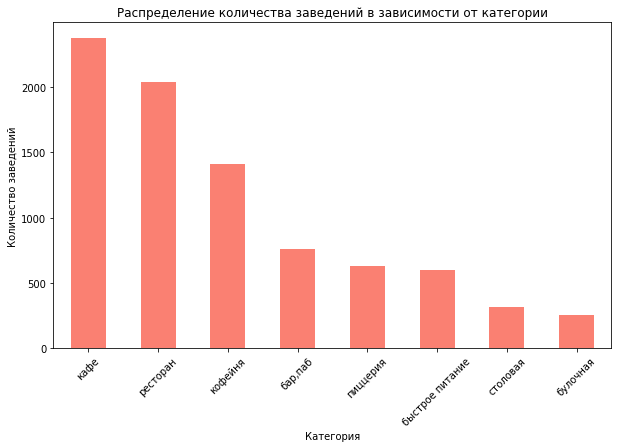

In [39]:
# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
df_category.plot(kind='bar',
title='Распределение количества заведений в зависимости от категории',
legend=False,
ylabel='Количество заведений',
xlabel='Категория',
rot=45,
color='salmon',
figsize=(10,6))

plt.show()

In [40]:
print('Распределение данных в долях по значениям столбца category:')
df['category'].value_counts(normalize=True)

Распределение данных в долях по значениям столбца category:


кафе               0.282875
ресторан           0.243008
кофейня            0.168154
бар,паб            0.090920
пиццерия           0.075330
быстрое питание    0.071760
столовая           0.037487
булочная           0.030465
Name: category, dtype: float64

In [41]:
df_category1=df['category'].value_counts(normalize=True)

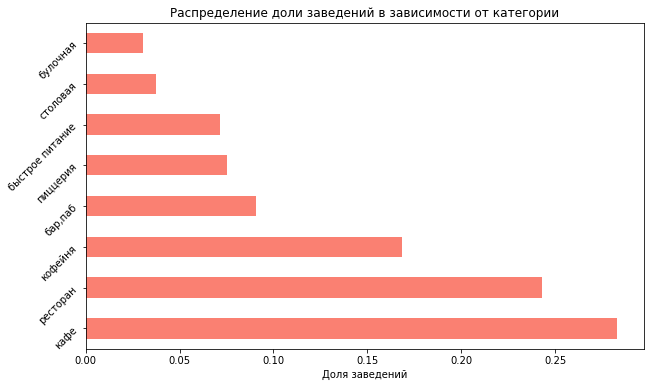

In [42]:
# Строим линейчатую диаграмму с помощью pandas через plot(kind='barh')
df_category1.plot(kind='barh',
title='Распределение доли заведений в зависимости от категории',
legend=False,
rot=45,
color='salmon',
figsize=(10,6))
plt.xlabel('Доля заведений')
plt.show()

В зависимости от типа количество заведений распределено неравномерно. Из выделенных 8 категорий наблюдается явное преимущество трех: 
- кафе - 2377 заведений или 0,28 от общего количества заведений,
- ресторан - 2042 заведения или 0,24 от общего количества заведений,
- кофейня - 1413 заведений или 0,17 от общего количества заведений.

---

### Задача 2

Изучим, какие административные районы Москвы присутствуют в данных. Исследуем распределение количества заведений по административным районам Москвы, а также отдельно распределение заведений каждой категории в Центральном административном округе Москвы. 

In [43]:
print('Распределение данных по значениям столбца district:')
df['district'].value_counts()

Распределение данных по значениям столбца district:


Центральный административный округ         2242
Северный административный округ             899
Южный административный округ                892
Северо-Восточный административный округ     890
Западный административный округ             850
Восточный административный округ            798
Юго-Восточный административный округ        714
Юго-Западный административный округ         709
Северо-Западный административный округ      409
Name: district, dtype: int64

Визуализируем распределение в столбце `district` и построим столбчатую диаграмму:

In [44]:
df_district=df['district'].value_counts()

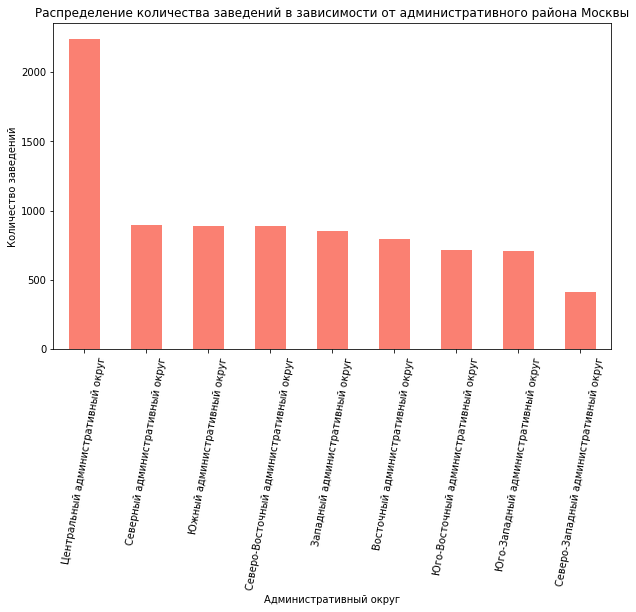

In [45]:
# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
df_district.plot(kind='bar',
title='Распределение количества заведений в зависимости от административного района Москвы',
legend=False,
ylabel='Количество заведений',
xlabel='Административный округ',
rot=80,
color='salmon',
figsize=(10,6))

plt.show()

In [46]:
print('Распределение данных в долях по значениям столбца district:')
df['district'].value_counts(normalize=True)

Распределение данных в долях по значениям столбца district:


Центральный административный округ         0.266809
Северный административный округ            0.106986
Южный административный округ               0.106153
Северо-Восточный административный округ    0.105915
Западный административный округ            0.101154
Восточный административный округ           0.094966
Юго-Восточный административный округ       0.084970
Юго-Западный административный округ        0.084375
Северо-Западный административный округ     0.048673
Name: district, dtype: float64

In [47]:
df_district1=df['district'].value_counts(normalize=True)

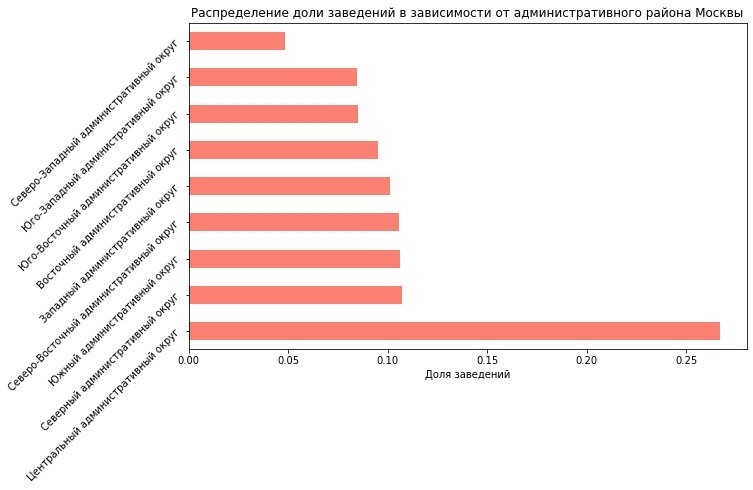

In [48]:
# Строим линейчатую диаграмму с помощью pandas через plot(kind='barh')
df_district1.plot(kind='barh',
title='Распределение доли заведений в зависимости от административного района Москвы',
legend=False,
rot=45,
color='salmon',
figsize=(10,6))
plt.xlabel('Доля заведений')
plt.show()

На графиках отчетливо видно, что явным преимуществом по количеству заведений обладает Центральный административный округ Москвы - 2242 заведения, что составляет 0,27 от общего количества. Явный аутсайдер - Северо-Западный административный округ, только 409 заведений, что составляет 0,05 от общего количества. Среди остальных округов количество заведений распределилось относительно одинаково.

In [49]:
print('Распределение заведений в Центральном административном округе по значениям столбца category:')
df[df['district']=='Центральный административный округ']['category'].value_counts()

Распределение заведений в Центральном административном округе по значениям столбца category:


ресторан           670
кафе               464
кофейня            428
бар,паб            364
пиццерия           113
быстрое питание     87
столовая            66
булочная            50
Name: category, dtype: int64

In [50]:
df_category_cao=df[df['district']=='Центральный административный округ']['category'].value_counts()

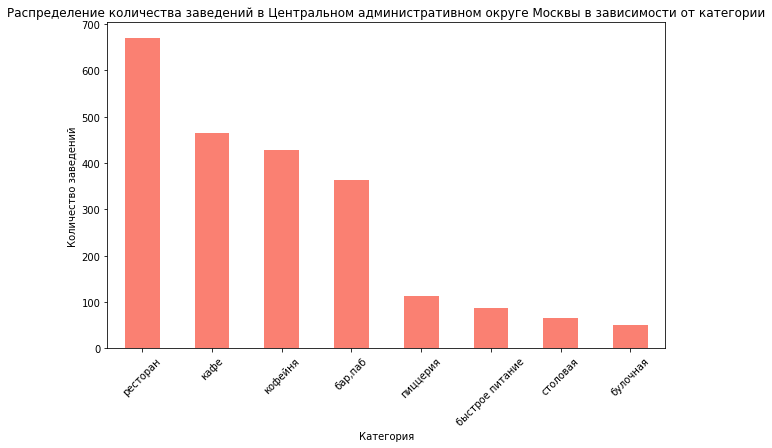

In [51]:
# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
df_category_cao.plot(kind='bar',
title='Распределение количества заведений в Центральном административном округе Москвы в зависимости от категории',
legend=False,
ylabel='Количество заведений',
xlabel='Категория',
rot=45,
color='salmon',
figsize=(10,6))

plt.show()

В Центральном административном округе Москвы наиболее распространены:
- рестораны - 670 заведений,
- кафе - 464 заведения,
- кофейни - 428 заведения,
- быры, пабы - 364 заведения.

Остальный категорий заведений в разы меньше.

---

### Задача 3

Изучим соотношение сетевых и несетевых заведений в целом по всем данным и в разрезе категорий заведения.

In [52]:
print('Распределение данных по значениям столбца chain:')
df['chain'].value_counts()

Распределение данных по значениям столбца chain:


0    5200
1    3203
Name: chain, dtype: int64

In [53]:
print('Распределение данных в долях по значениям столбца chain:')
df['chain'].value_counts(normalize=True)

Распределение данных в долях по значениям столбца chain:


0    0.618827
1    0.381173
Name: chain, dtype: float64

Для визуализации распределения построим столбчатую диаграмму

In [54]:
df_chain=df.groupby('chain')['id'].count().reset_index()

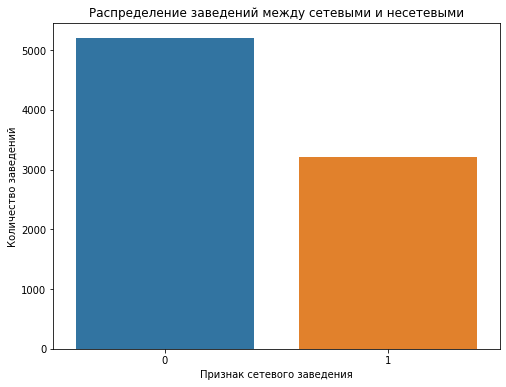

In [55]:
# Строим столбчатую диаграмму 

# Задаём размер графика
plt.figure(figsize=(8, 6))

sns.barplot(data=df_chain,x='chain',y='id')
plt.title('Распределение заведений между сетевыми и несетевыми')
plt.ylabel('Количество заведений')
plt.xlabel('Признак сетевого заведения')

plt.show()

In [56]:
df_chain=df['chain'].value_counts(normalize=True).reset_index()
df_chain

,index,chain
0,0,0.618827
1,1,0.381173


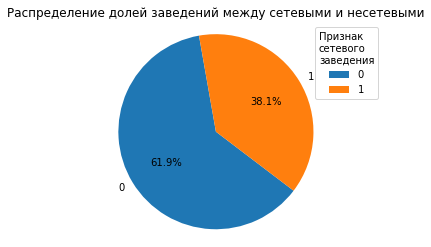

In [57]:
# Построение круговой диаграммы для отражения распределения долей сетевых и несетевых заведений
plt.pie(df_chain['chain'], labels=df_chain['index'], autopct='%1.1f%%', startangle=100)

# Настройка оси для круговой диаграммы
plt.axis('equal')

plt.title('Распределение долей заведений между сетевыми и несетевыми')
plt.legend(title='Признак\nсетевого\nзаведения')
# Показать диаграмму
plt.show()

Изучим рарспределение сетевых и несетевых заведений в разрезе категорий

In [58]:
df_chain1=df.groupby(['category','chain'])['id'].agg('count').reset_index()

In [59]:
df_chain1

,category,chain,id
0,"бар,паб",0,596
1,"бар,паб",1,168
2,булочная,0,99
3,булочная,1,157
4,быстрое питание,0,371
5,быстрое питание,1,232
6,кафе,0,1598
7,кафе,1,779
8,кофейня,0,693
9,кофейня,1,720


In [60]:
 # Задаём функцию для анализа данных
def sns_hue (df, x, y, hue, title_, y_label, x_label):
    '''
    Функция для анализа распределения метрики по признакам c группировкой:
    df - датафрейм с данными для анализа;
    x - str, название столбца для оси х;
    y - str, название столбца для оси y;
    hue - str, название столбца, по которому будет осуществлена группировка;
    title_ - str, заголовок графика;
    y_label - str, подпись по оси Y;
    x_label - str, подпись по оси X.
    '''
    plt.figure(figsize=(10, 6))
    sns.barplot(data=df,x=x,y=y, hue=hue)
    plt.title(title_)
    plt.ylabel(y_label)
    plt.xlabel(x_label)
    plt.xticks(rotation=45)  

    plt.show()


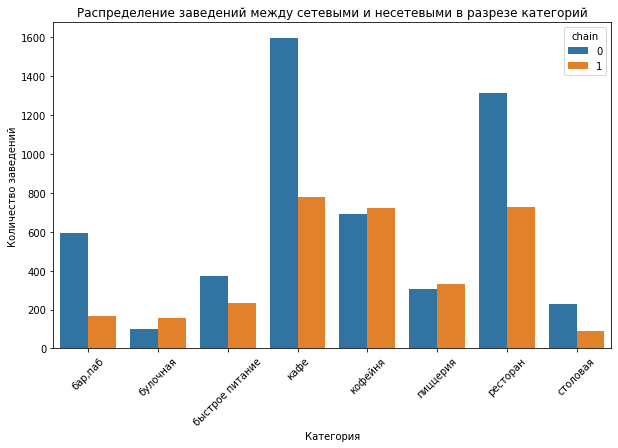

In [61]:
# Строим столбчатую диаграмму с помощью функции
sns_hue(df_chain1, 'category', 'id', 'chain', 
       'Распределение заведений между сетевыми и несетевыми в разрезе категорий',
       'Количество заведений', 'Категория')

Представим эту же визуализацию в иной группировке

In [62]:
df_chain2=df.groupby(['chain','category'])['id'].agg('count').reset_index()

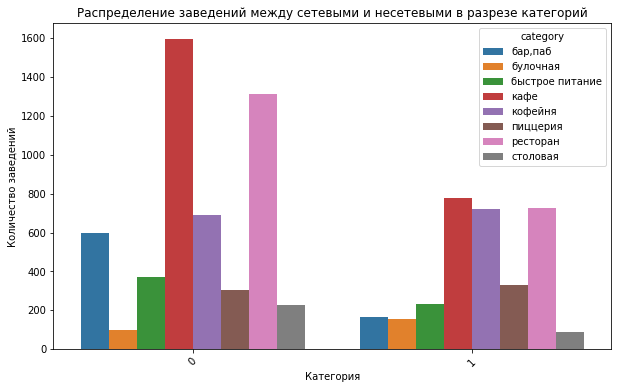

In [63]:
# Строим столбчатую диаграмму с помощью функции
sns_hue(df_chain1, 'chain', 'id', 'category', 
       'Распределение заведений между сетевыми и несетевыми в разрезе категорий',
       'Количество заведений', 'Категория')

In [64]:
# Высчитаем долю сетевых и несетевых заведений в кажой категрии
for i in df_chain1.index.to_list():
    a=df_chain1.loc[i,'category']
    grouped=df_chain1[df_chain1['category']==a]
    df_chain1.loc[i,'share']=round(df_chain1.loc[i,'id']*100/grouped['id'].sum(),2)

In [65]:
df_chain1[df_chain1['chain']==1].sort_values(by='share',ascending=False)

,category,chain,id,share
3,булочная,1,157,61.33
11,пиццерия,1,330,52.13
9,кофейня,1,720,50.96
5,быстрое питание,1,232,38.47
13,ресторан,1,729,35.70
7,кафе,1,779,32.77
15,столовая,1,88,27.94
1,"бар,паб",1,168,21.99


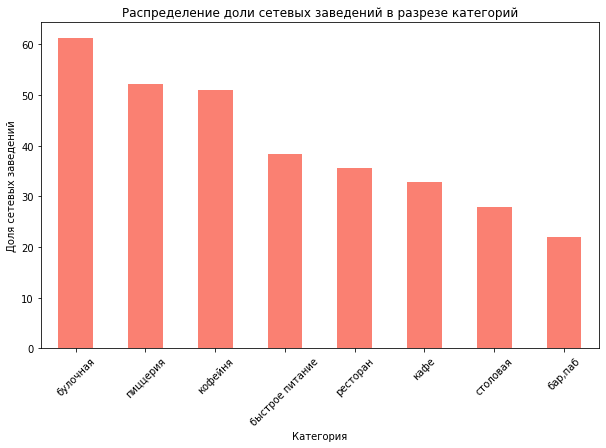

In [66]:
# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
df_chain1[df_chain1['chain']==1].sort_values(by='share',ascending=False).plot(kind='bar',
x='category', y='share',
title='Распределение доли сетевых заведений в разрезе категорий',
legend=False,
ylabel='Доля сетевых заведений',
xlabel='Категория',
rot=45,
color='salmon',
figsize=(10,6))

plt.show()

Результаты исследования показывают, что несетевых заведий больше - всего 5200, что составляет 0,62 от общего количества.

Распределение заведений внутри сетевых и несетевых заведений неравномерное.
Более неравномерно в несетевых, где явно преобладают кафе и рестораны. Среди сетевых заведений преобладаю три категрии заведений - кафе, рестораны и кофейни. При этом среди кофеен преобладают именно сетевые, нежели несетевые.

Если рассматривать сетевые заведения, то в трех категория их доля более 50%: булочная, пиццерия, кофейня.

---

### Задача 4

Исследуем количество посадочных мест в заведениях. 


In [67]:
#Отфильтруем датасет по столбцу seats, исключив значение -1
df_seats_filtr=df[df['seats']!=-1]

In [68]:
# Изучаем статистические показатели столбца seats
print('Статистические показатели столбца seats:')
df_seats_filtr['seats'].describe()

Статистические показатели столбца seats:


count    4792.000000
mean      108.361436
std       122.841130
min         0.000000
25%        40.000000
50%        75.000000
75%       140.000000
max      1288.000000
Name: seats, dtype: float64

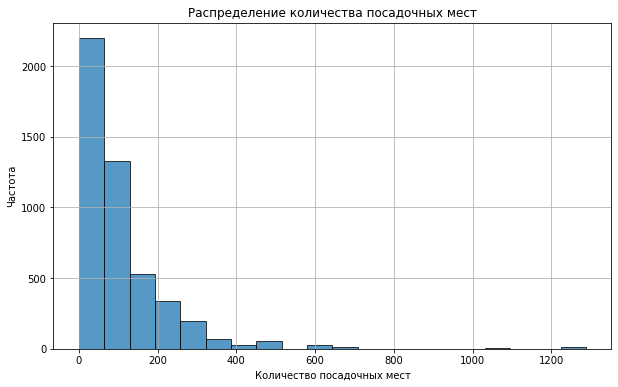

In [69]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(10, 6))

# Строим гистограмму с помощью pandas через plot(kind='hist')
df_seats_filtr['seats'].plot(
                kind='hist', 
                bins=20, 
                alpha=0.75,
                edgecolor='black',
                rot=0)

# Настраиваем оформление графика
plt.title('Распределение количества посадочных мест')
plt.xlabel('Количество посадочных мест')
plt.ylabel('Частота')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

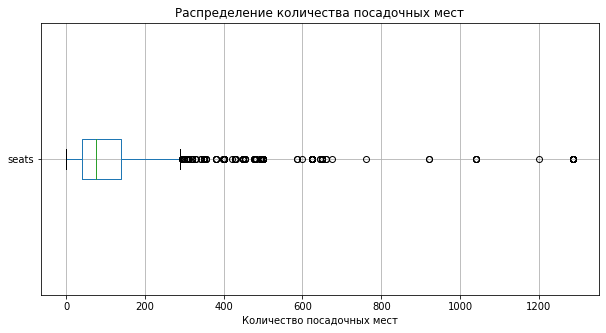

In [70]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(10, 5))

# Строим диаграмму размаха значений в столбце 
df_seats_filtr.boxplot(column='seats', vert=False)

# Добавляем заголовок и метки оси
plt.title('Распределение количества посадочных мест')
plt.xlabel('Количество посадочных мест')

# Выводим график
plt.show()

По гистограмме видно, что распределение имеет широкий разброс и наблюдается правосторонняя ассиметрия. На диаграмме размаха видно, что в правой части наблюдается много выбросов. Однако сами значения, как минимальные, так и максимальные, не выглядят ошибкой, в заведении может совсем не быть посадочных мест или, наоборот, вместимость может быть достаточно большая для массовых мероприятий. 

Для определения наиболее типично количества посадочных мест по категриям зведений, исключим максимальные значения-выбросы и оставим выборку ниже 95 перцентилей.

In [71]:
# Изучаем статистические показатели столбца seats с расширенным списком перцентилей
df_seats_filtr['seats'].describe(percentiles=[0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99])

count    4792.000000
mean      108.361436
std       122.841130
min         0.000000
50%        75.000000
60%        92.000000
70%       116.000000
80%       160.000000
90%       240.000000
95%       307.000000
99%       625.000000
max      1288.000000
Name: seats, dtype: float64

In [72]:
# Отфильтруем датасет по значению посадочных мест не более 307, 
#  которое соответсвует 95 перцентилю.
df_seats_filtr_95=df_seats_filtr[df_seats_filtr['seats']<=307]

In [73]:
# Изучаем статистические показатели столбца seats в отфильтрованном датасете
df_seats_filtr_95['seats'].describe()

count    4553.000000
mean       88.271909
std        71.058618
min         0.000000
25%        40.000000
50%        70.000000
75%       120.000000
max       307.000000
Name: seats, dtype: float64

In [74]:
# Найдем средние значения числа посадочных мест в каждой категории заведений и отсотрируем по количеству
df_seats_filtr_95_gr=df_seats_filtr_95.groupby('category')['seats'].agg('mean').astype(int)
df_seats_filtr_95_gr=df_seats_filtr_95_gr.sort_values(ascending=False).reset_index()

df_seats_filtr_95_gr

,category,seats
0,ресторан,100
1,"бар,паб",95
2,кофейня,89
3,быстрое питание,85
4,столовая,81
5,булочная,79
6,пиццерия,79
7,кафе,78


Визуализируем полученныерезультаты на столбчатой диаграмме

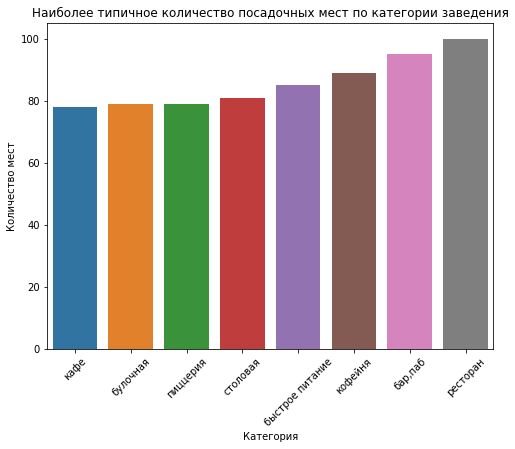

In [75]:
plt.figure(figsize=(8, 6))
# Сортируем категории по среднему количеству мест
order = df_seats_filtr_95_gr.groupby('category')['seats'].mean().sort_values().index
sns.barplot(data=df_seats_filtr_95_gr, y='seats', x='category', order=order)
plt.title('Наиболее типичное количество посадочных мест по категории заведения')
plt.ylabel('Количество мест')
plt.xlabel('Категория')
plt.xticks(rotation=45)
plt.show()

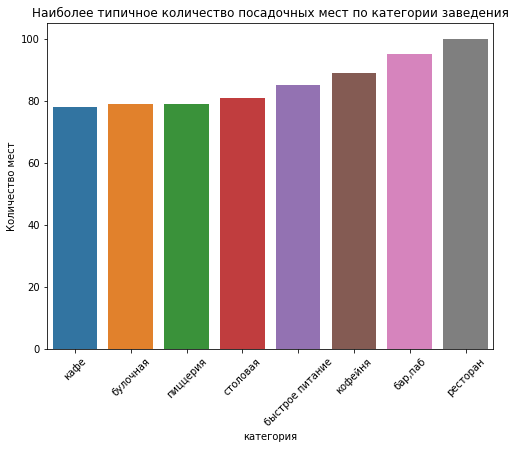

In [76]:
# Строим столбчатую диаграмму 

# Задаём размер графика
plt.figure(figsize=(8, 6))

sns.barplot(data=df_seats_filtr_95_gr, y='seats', x='category', order=order)
plt.title('Наиболее типичное количество посадочных мест по категории заведения')
plt.ylabel('Количество мест')
plt.xlabel('категория')
plt.xticks(rotation=45) 

plt.show()

<Figure size 720x432 with 0 Axes>

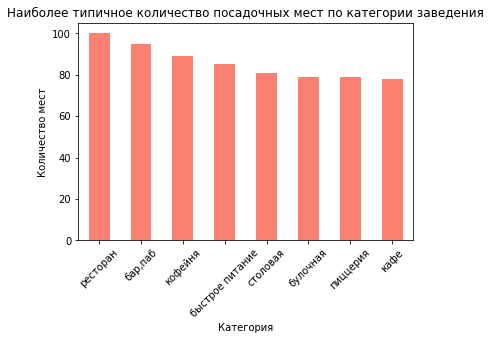

In [77]:
# Задаём размер графика
plt.figure(figsize=(10, 6))
# Строим столбчатую диаграмму 
df_seats_filtr_95_gr.plot(kind='bar', x='category', y='seats', color='salmon',legend=False)
plt.title('Наиболее типичное количество посадочных мест по категории заведения')
plt.ylabel('Количество мест')
plt.xlabel('Категория')
plt.xticks(rotation=45) 
plt.show()

Типичное число посадочных мест не сильно различается по категриям заведения, но видно, что наибольшими значениями обладают ресторан и бар, паб.

Проверим эти данные с помощью графика KDE для датасета df_seats_filtr и оценим функции плотности вероятности.

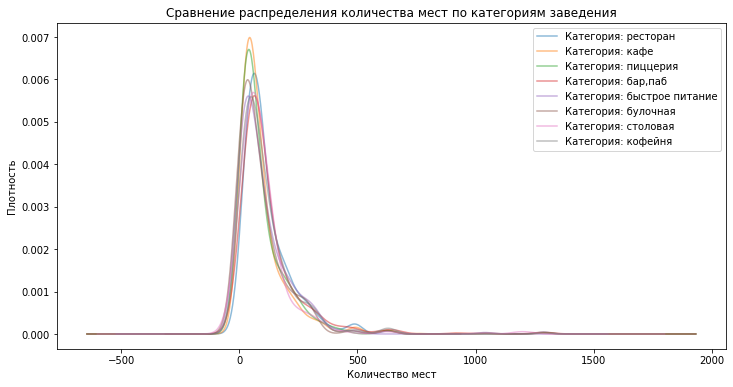

In [78]:
# Строим гистограмму распределения значений количества посадочных мест
column = 'seats'

# Создаём фигуру графика
plt.figure(figsize=(12, 6))

# Строим гистограммы для каждого значения category
for i in df_seats_filtr['category'].unique():
    # Фильтруем данные по значению столбца category
    df_seats_filtr.loc[df_seats_filtr['category'] == i, column].plot(
        kind='kde',
        alpha=0.5,
        label=f'Категория: {i}',
        legend=True
    )

# Настраиваем внешний вид графика и выводим его на экран
plt.title(f'Сравнение распределения количества мест по категориям заведения')
plt.xlabel('Количество мест')
plt.ylabel('Плотность')
plt.legend()
plt.show()

По графику видно, что, дейтвительно, наибольшие вероятности встретить определенное количество посадочных мест в каждой группе сходятся в одном диапазоне.

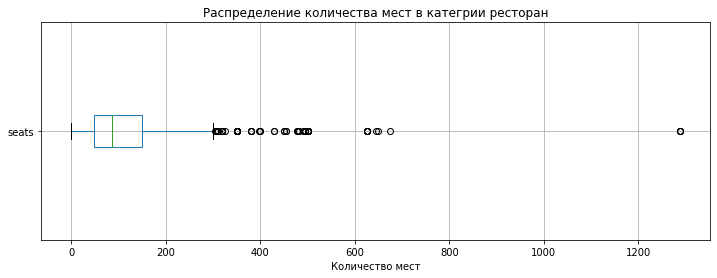

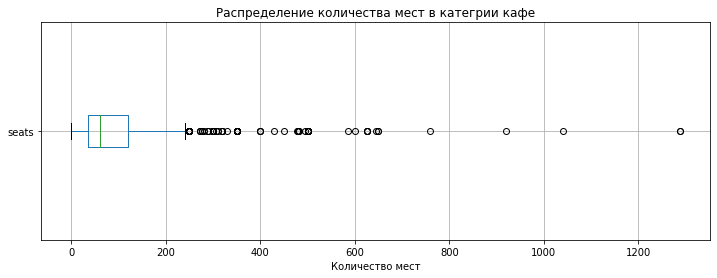

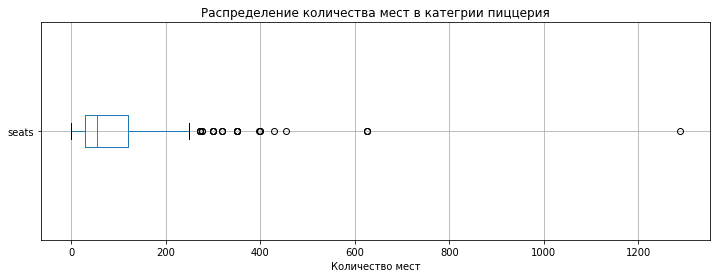

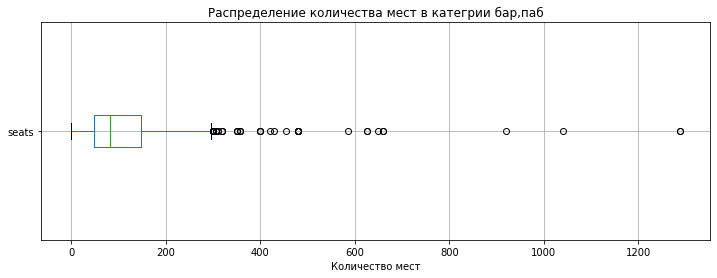

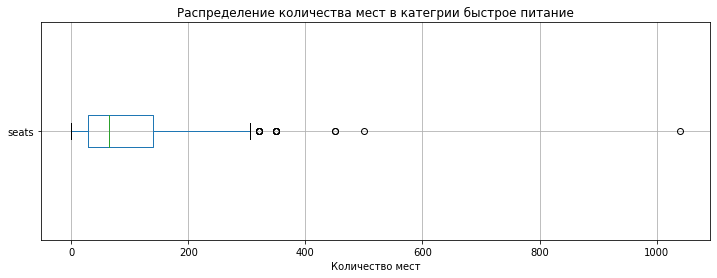

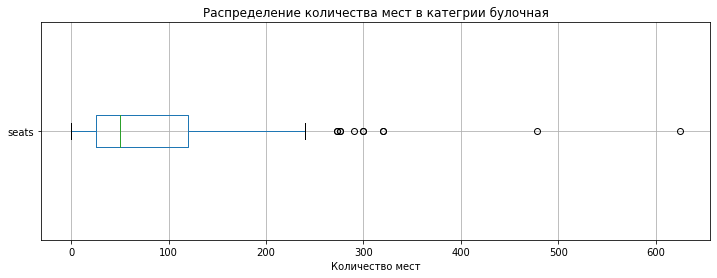

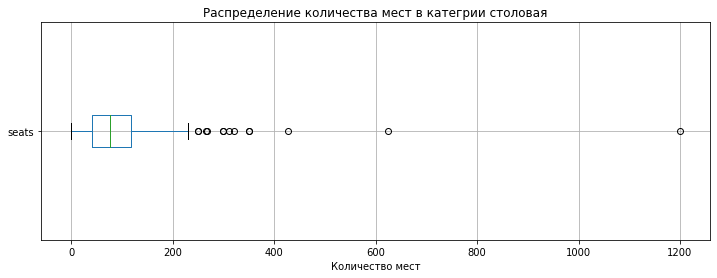

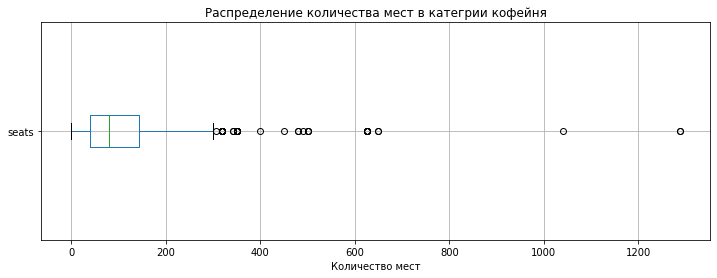

In [79]:
# Строим диаграммы размаха значений количества посадочных мест для 
# каждой категории заведения
column = 'seats'

for i in df_seats_filtr['category'].unique():
    # Создаём фигуру графика
    plt.figure(figsize=(12, 4))
    # Фильтруем данные по значению столбца category
    df_seats_filtr.loc[df_seats_filtr['category'] == i].boxplot(column,
    vert=False  
    )
    # Настраиваем внешний вид графика и выводим его на экран
    plt.title(f'Распределение количества мест в категрии {i}')
    plt.xlabel('Количество мест')
    plt.grid(True)
    plt.show()

---

### Задача 5

Исследуем рейтинг заведений. Изучим распределение средних рейтингов по категориям заведений. 

In [80]:
# Изучаем статистические показатели столбца seats
print('Статистические показатели столбца rating:')
df['rating'].describe()

Статистические показатели столбца rating:


count    8403.000000
mean        4.229894
std         0.470426
min         1.000000
25%         4.100000
50%         4.300000
75%         4.400000
max         5.000000
Name: rating, dtype: float64

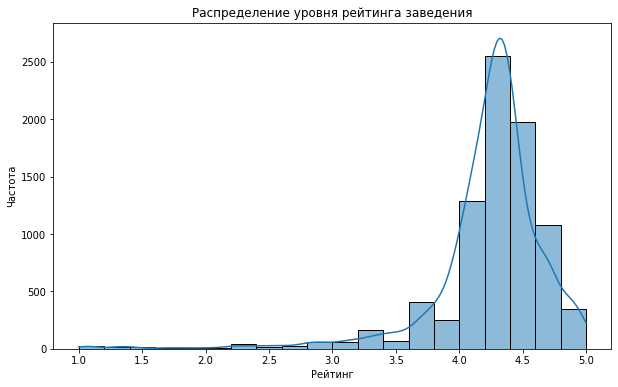

In [81]:
# Строим гистограмму
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='rating', bins=20, kde=True)
plt.title('Распределение уровня рейтинга заведения')
plt.xlabel('Рейтинг')
plt.ylabel('Частота')
plt.show()

По графигку видим, что наблюдается левосторонняя скошенность. Рейтинги заведений варьируются от 1.0 до 5.0. Среднее значение и медиана близки - 4.2 и 4.3. Стандартное отклонение небольшое - 0.5. 

In [82]:
df.groupby('category')['rating'].mean().sort_values(ascending=False)

category
бар,паб            4.387696
пиццерия           4.301264
ресторан           4.290402
кофейня            4.277282
булочная           4.268359
столовая           4.211429
кафе               4.123896
быстрое питание    4.050249
Name: rating, dtype: float64

In [83]:
 # Задаём функцию для анализа данных
def plot_bar_plot(df, kind_f, group_by, value, aggfunc, title_, y_label, x_label):
    '''
    Функция для анализа распределения метрики по признакам:
    df - датафрейм с данными для анализа;
    kind_f - str, название типа визуализации;
    group_by - str, название столбца для группировки данных;
    value - str, название столбца, значение которого будет агрегироваться;
    aggfunc - str, функция агрегации, которая используется для расчёта;
    title_ - str, заголовок графика;
    y_label - str, подпись по оси Y;
    x_label - str, подпись по оси X.
    '''
    grouped = df.groupby(group_by).agg({value:aggfunc}).sort_values(by=value,ascending=False)
    grouped.plot(kind=kind_f,
                   title=title_,
                   legend=True,
                   ylabel=y_label,
                   xlabel=x_label,
                   color='salmon',
                   rot=75,
                   figsize=(10, 6))

    # Рассчитываем общее значение value по всем данным
    mean_share = df.agg({value:aggfunc})[0]

    # Наносим на график линию с значением value по всем данным
    plt.axhline(mean_share, color='green',
                linestyle='--', linewidth=1,
                label=f'Значение по всем данным {round(mean_share,4)}')

    plt.grid()
    plt.legend(loc='lower right')
    plt.show()


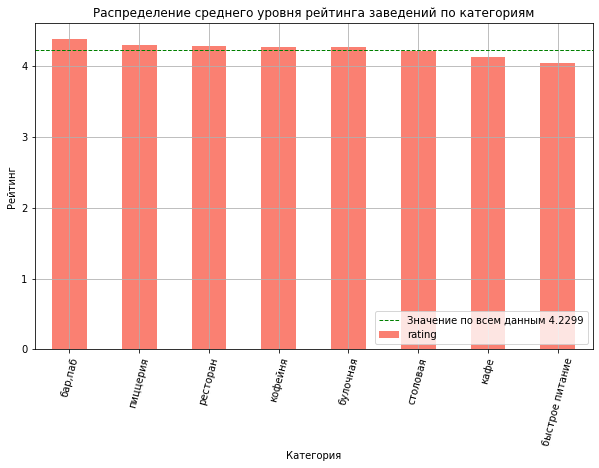

In [84]:
 # Применим функция для построения графика

plot_bar_plot(df, 'bar', 'category', 'rating', 'mean', 'Распределение среднего уровня рейтинга заведений по категориям', 'Рейтинг', 'Категория')

На графике видно, что средний рейтинг заведений по каждой группе отличается незначительно друг от друга и от среднего по всем заведениям в целом. Но можно выделить группу с максимальным рейтингом - это категория Бар, паб.

---

### Задача 6

Изучим, с какими данными показывают самую сильную корреляцию рейтинги заведений. Построим и визуализируем матрицу корреляции рейтинга заведения с разными данными: его категория, положение (административный район Москвы), статус сетевого заведения, количество мест, ценовая категория и признак, является ли заведения круглосуточным. 

In [85]:
# Вычисляем корреляционную матрицу 
correlation_matrix = df[['rating', 'category', 'district', 'chain', 'seats',
                         'price', 'is_24_7']].phik_matrix()

# Выводим результат
print('Корреляционная матрица для переменной rating')
correlation_matrix.loc[correlation_matrix.index != 'rating'][['rating']].sort_values(by='rating', ascending=False)

interval columns not set, guessing: ['rating', 'chain', 'seats']
Корреляционная матрица для переменной rating


,rating
price,0.281392
district,0.200701
category,0.189904
is_24_7,0.150210
chain,0.108060
seats,0.000000


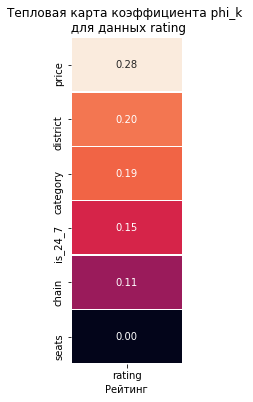

In [86]:
# Строим тепловую карту
plt.figure(figsize=(2, 6))

# Сохраняем матрицу корреляции 
data_heatmap = correlation_matrix.loc[correlation_matrix.index != 'rating'][['rating']].sort_values(by='rating', ascending=False)
sns.heatmap(data_heatmap,
            annot=True, 
            fmt='.2f', 
            cmap='rocket', 
            linewidths=0.5, 
            cbar=False # 
           )

# Добавляем заголовок и подпись по оси Х
plt.title('Тепловая карта коэффициента phi_k \n для данных rating')
plt.xlabel('Рейтинг')

# Выводим график
plt.show()

In [87]:
# Так как в столбцах seats и price есть значения-индикаторы, 
# то отфильтруем датасет, очистив соответсвующие столбцы 
df_filtr_1=df[(df['seats']!=-1)&(df['price']!='Нет данных')]

In [88]:
# Вычислим корреляционную матрицу по отфильтрованному датасету
correlation_matrix1 = df_filtr_1[['rating', 'category', 'district', 'chain', 'seats',
                         'price', 'is_24_7']].phik_matrix()

interval columns not set, guessing: ['rating', 'chain', 'seats']


In [89]:
# Выводим результат
print('Корреляционная матрица для переменной rating по отфильтрованному датасету')
correlation_matrix1.loc[correlation_matrix1.index != 'rating'][['rating']].sort_values(by='rating', ascending=False)

Корреляционная матрица для переменной rating по отфильтрованному датасету


,rating
district,0.270061
price,0.250513
category,0.182997
is_24_7,0.093350
chain,0.065383
seats,0.000000


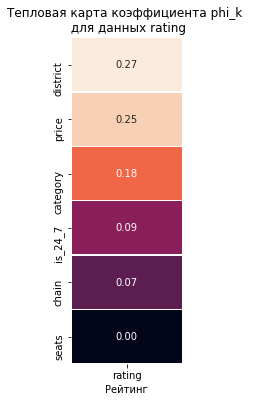

In [90]:
# Строим тепловую карту
plt.figure(figsize=(2, 6))

# Сохраняем матрицу корреляции 
data_heatmap1 = correlation_matrix1.loc[correlation_matrix1.index != 'rating'][['rating']].sort_values(by='rating', ascending=False)
sns.heatmap(data_heatmap1,
            annot=True, 
            fmt='.2f', 
            cmap='rocket', 
            linewidths=0.5, 
            cbar=False # 
           )

# Добавляем заголовок и подпись по оси Х
plt.title('Тепловая карта коэффициента phi_k \n для данных rating')
plt.xlabel('Рейтинг')

# Выводим график
plt.show()

Не смотря на то, что очистка датасета от занчений-индикаторов немного повлияла на значения матриц корреляции, в обоих случаях видно, что на рейтинг в большей мере влияют 2 показателя: ценовая политика и расположение заведения.

Посмотрим на взаимосвязь между рейтингом и ценовой политикой, построив столбчатую диаграмму.

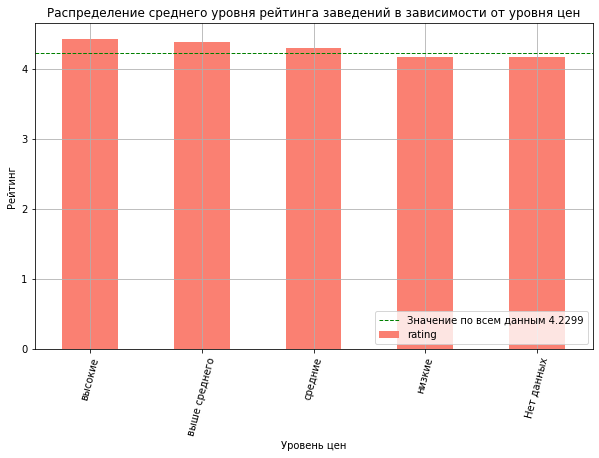

In [91]:
# Применим фунцию
plot_bar_plot(df, 'bar', 'price', 'rating', 'mean', 'Распределение среднего уровня рейтинга заведений в зависимости от уровня цен', 'Рейтинг', 'Уровень цен')

На графике наблюдается слабая зависимость:чем выше уровень цен, тем выше рейтинг заведения.

Посмотрим на взаимосвязь между рейтингом и административным округом, построив столбчатую диаграмму.

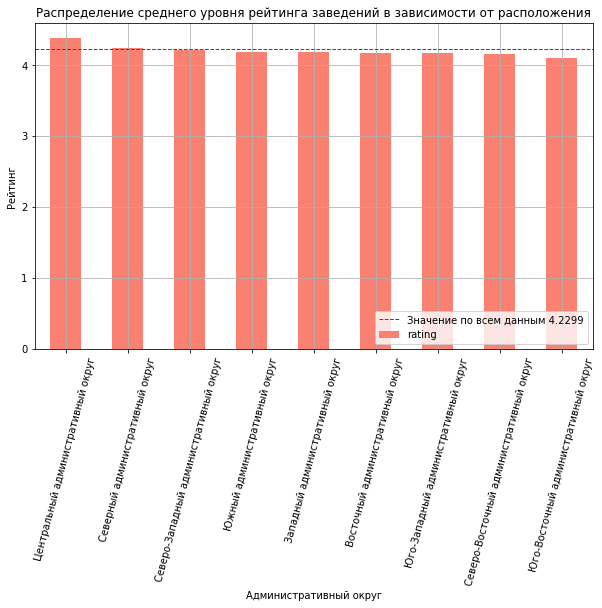

In [92]:
# Применим фунцию
plot_bar_plot(df, 'bar', 'district', 'rating', 'mean', 'Распределение среднего уровня рейтинга заведений в зависимости от расположения', 'Рейтинг', 'Административный округ')

На графике видно, что рейтинг заведений в ЦАО выше среднего уровня рейтинга и выше, чем рейтинг в других АО.

---

### Задача 7

Сгруппируем данные по названиям заведений и найдем топ-15 популярных сетей в Москве. Для них посчитайте значения среднего рейтинга. 

In [93]:
# Выводим список Топ-15популярных сетей в Москве
df.groupby(['name', 'category'])['id'].count().sort_values(ascending=False).reset_index()[0:15]

,name,category,id
0,кафе,кафе,159
1,шоколадница,кофейня,119
2,домино'с пицца,пиццерия,77
3,додо пицца,пиццерия,74
4,one price coffee,кофейня,72
5,яндекс лавка,ресторан,69
6,cofix,кофейня,65
7,prime,ресторан,49
8,кофепорт,кофейня,42
9,кулинарная лавка братьев караваевых,кафе,39


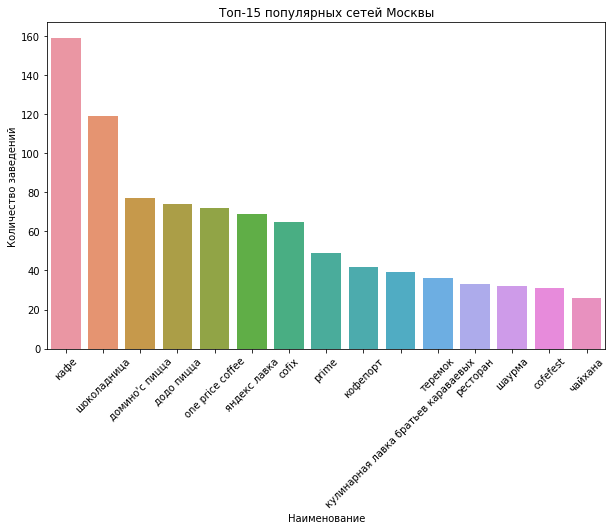

In [94]:
# Строим столбчатую диаграмму 

top_15=df.groupby(['name', 'category'])['id'].count().sort_values(ascending=False).reset_index()[0:15]

# Задаём размер графика
plt.figure(figsize=(10, 6))

sns.barplot(data=top_15,x='name',y='id')
plt.title('Топ-15 популярных сетей Москвы')
plt.ylabel('Количество заведений')
plt.xlabel('Наименование')
plt.xticks(rotation=45) 

plt.show()

In [95]:
# С помощью цикла добавим колонку со значением среднего рейтинга 
# заведений из Топ-15 сетей Москвы
for i, a in enumerate(top_15['name']):
    grouped=df[df['name']==a]
    top_15.loc[i,'rating_mean']=round(grouped['rating'].mean(),2)
  


In [96]:
# Выводим датасет, отсортировав его по уровню рейтинга
top_15_1=top_15.sort_values(by=['category','rating_mean'], ascending=False).reset_index()
top_15_1

,index,name,category,id,rating_mean
0,11,ресторан,ресторан,33,4.31
1,7,prime,ресторан,49,4.12
2,10,теремок,ресторан,36,4.12
3,5,яндекс лавка,ресторан,69,3.87
4,3,додо пицца,пиццерия,74,4.29
5,2,домино'с пицца,пиццерия,77,4.17
6,1,шоколадница,кофейня,119,4.18
7,8,кофепорт,кофейня,42,4.15
8,6,cofix,кофейня,65,4.08
9,4,one price coffee,кофейня,72,4.07


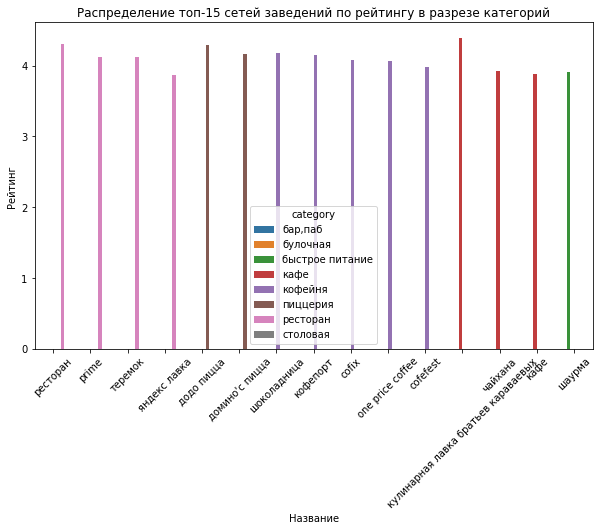

In [97]:
# Строим столбчатую диаграмму с помощью функции
sns_hue(top_15_1, 'name', 'rating_mean', 'category', 
       'Распределение топ-15 сетей заведений по рейтингу в разрезе категорий',
       'Рейтинг', 'Название')

In [98]:
#Сгруппируем значения популярных сетей заведений по категориям
top_15_gr=top_15.groupby('category').agg({'id':'sum', 'rating_mean':'mean'}).reset_index()
top_15_gr

,category,id,rating_mean
0,"бар,паб",0,NaN
1,булочная,0,NaN
2,быстрое питание,32,3.910000
3,кафе,224,4.063333
4,кофейня,329,4.092000
5,пиццерия,151,4.230000
6,ресторан,187,4.105000
7,столовая,0,NaN


Визуализируем данные

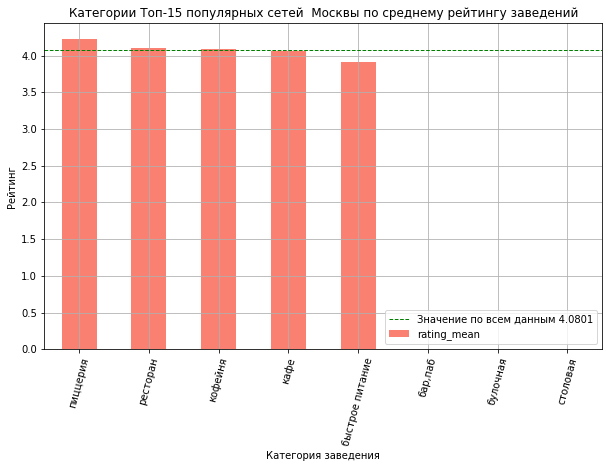

In [99]:
# Применим фунцию
plot_bar_plot(top_15_gr.sort_values(by='rating_mean', ascending=False),
    'bar', 'category', 'rating_mean', 'mean', 
    'Категории Топ-15 популярных сетей  Москвы по среднему рейтингу заведений', 'Рейтинг', 'Категория заведения')

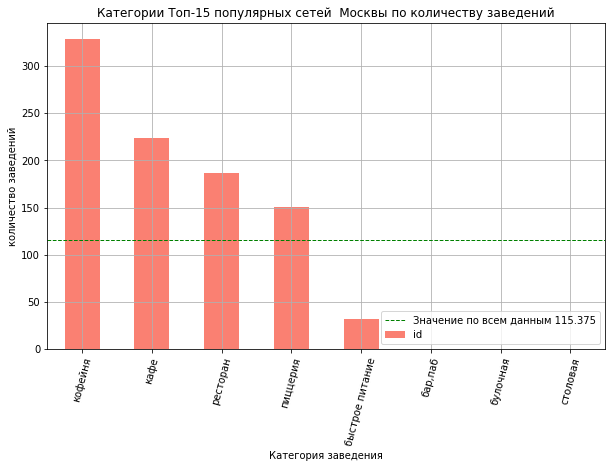

In [100]:
# Применим фунцию
plot_bar_plot(top_15_gr.sort_values(by='id', ascending=False),
    'bar', 'category', 'id', 'mean', 
    'Категории Топ-15 популярных сетей  Москвы по количеству заведений', 'количество заведений', 'Категория заведения')

Список самых популярных серевых заведений возглавляет Кафе, такое название могут иметь не относящиеся друг к другу заведения, так как название достаточное общее. За ним следует Шоколадница.

Рассматривая список топ-15 популярных сетей Москвы по категриям, видим, что самое большая по количеству заведений категория - это кофейни и кафе, а по рейтингу категрии примерно равны, но лидеров тоже можно выделить - это пиццерии и рестораны.



---

### Задача 8

Изучим вариацию среднего чека заведения (столбец `middle_avg_bill`) в зависимости от района Москвы. Проанализируем цены в Центральном административном округе и других. 


In [101]:
# Изучаем статистические показатели столбца middle_avg_bill
print('Статистические показатели столбца middle_avg_bill:')
df['middle_avg_bill'].describe()

Статистические показатели столбца middle_avg_bill:


count     3149.000000
mean       958.053668
std       1009.732845
min          0.000000
25%        375.000000
50%        750.000000
75%       1250.000000
max      35000.000000
Name: middle_avg_bill, dtype: float64

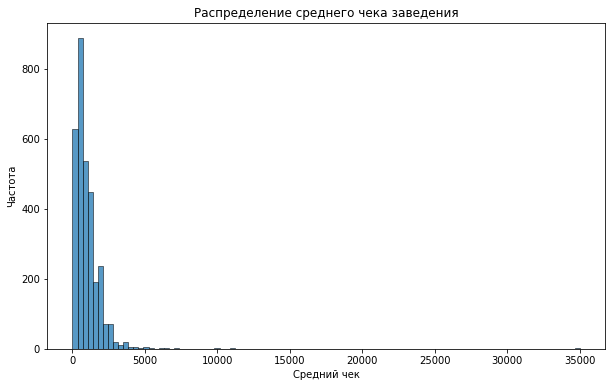

In [102]:
# Строим гистограмму
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='middle_avg_bill', bins=100)
plt.title('Распределение среднего чека заведения')
plt.xlabel('Средний чек')
plt.ylabel('Частота')
plt.show()

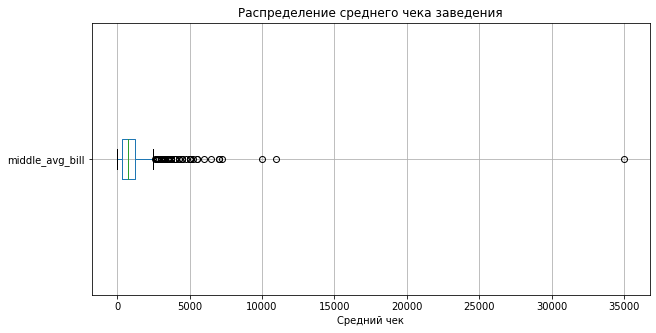

In [103]:
# Строим диаграмму размаха значений в столбце 
plt.figure(figsize=(10, 5))
df.boxplot(column='middle_avg_bill', vert=False)
plt.title('Распределение среднего чека заведения')
plt.xlabel('Средний чек')
plt.show()

---


In [104]:
# Изучаем статистические показатели столбца middle_avg_bill с расширенным списком перцентилей
df['middle_avg_bill'].describe(percentiles=[0.005, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99, 0.995])

count     3149.000000
mean       958.053668
std       1009.732845
min          0.000000
0.5%       120.000000
50%        750.000000
60%       1000.000000
70%       1200.000000
80%       1470.000000
90%       2000.000000
95%       2250.000000
99%       3750.000000
99.5%     5000.000000
max      35000.000000
Name: middle_avg_bill, dtype: float64

Распределение уровня среднего чека имеет правостороннюю ассиметрию. Но гистограмма малоинформативна. Разброс значений большой, а наиболее часто встречающиеся сконцентрированы в левой части графика и приходятся на узкий диапазон значений среднего счета. 

На диаграмме размаха видно, что в правой части графика много выбросов, среди которых выделяется максимальное значение, слишком нетипичное. Для дальнейшего анализа стоит отфильтровать датасет по столбцу middle_avg_bill, оставив значения ниже 99.5 перцентеля.

In [105]:
df_avg_bill_filtr=df[(df['middle_avg_bill']<=3500)]

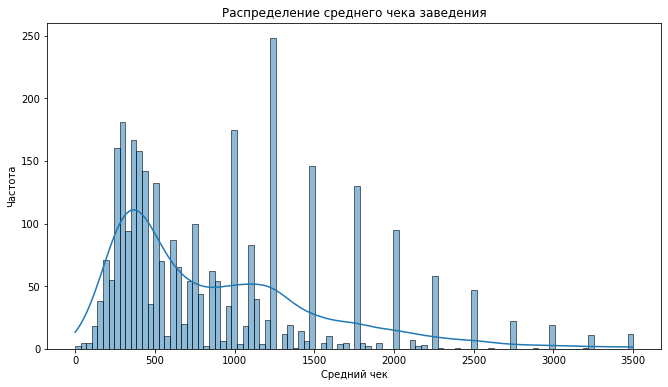

In [106]:
# Строим гистограмму для отфильтрованного датасета
plt.figure(figsize=(11, 6))
sns.histplot(data=df_avg_bill_filtr, x='middle_avg_bill', bins=100, kde=True)
plt.title('Распределение среднего чека заведения')
plt.xlabel('Средний чек')
plt.ylabel('Частота')
plt.show()

По графику видно, что распределение неравноемерное, но имеет тенденцию правосторонней иссиметрии. Выделяются явные наиболее часто встречающиеся диапазоны среднего чека: в районе 500 и 1000.

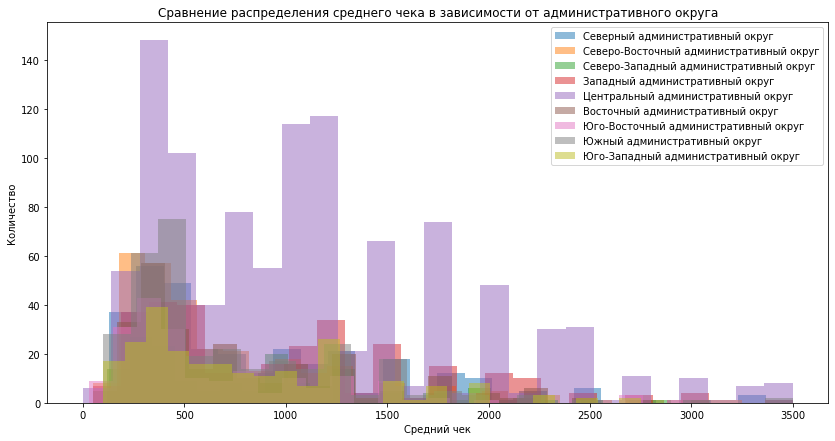

In [107]:
# Строим гистограммы распределения среднего чека в зависимости от административного округа
plt.figure(figsize=(14, 7))

# Строим гистограммы для каждого значения district
for i in df_avg_bill_filtr['district'].unique():
    # Фильтруем данные по значению столбца district
    df_avg_bill_filtr.loc[df_avg_bill_filtr['district'] == i, 'middle_avg_bill'].plot(
        kind='hist',
        bins=25,
        alpha=0.5,
        label=f'{i}',
        legend=True
    )

# Настраиваем внешний вид графика и выводим его на экран
plt.title(f'Сравнение распределения среднего чека в зависимости от административного округа')
plt.xlabel('Средний чек')
plt.ylabel('Количество')

plt.show()

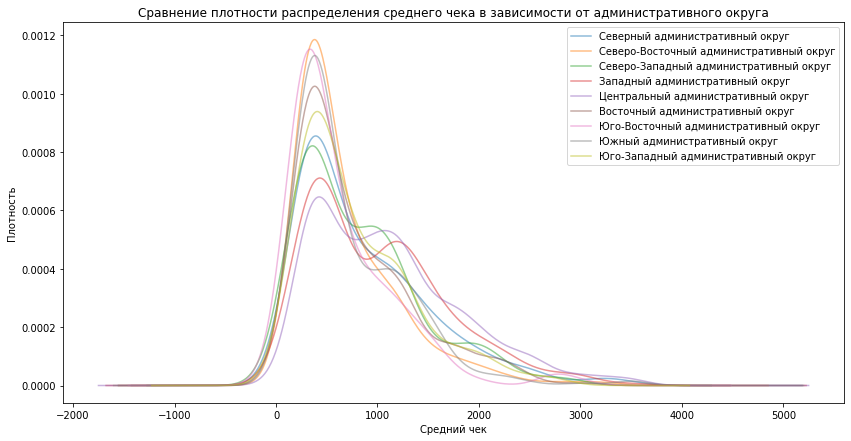

In [108]:
# Строим гистограммы распределения среднего чека в зависимости от административного округа
plt.figure(figsize=(14, 7))

# Строим гистограммы для каждого значения district
for i in df_avg_bill_filtr['district'].unique():
    # Фильтруем данные по значению столбца district
    df_avg_bill_filtr.loc[df_avg_bill_filtr['district'] == i, 'middle_avg_bill'].plot(
        kind='kde',
        alpha=0.5,
        label=f'{i}',
        legend=True
    )

# Настраиваем внешний вид графика и выводим его на экран
plt.title(f'Сравнение плотности распределения среднего чека в зависимости от административного округа')
plt.xlabel('Средний чек')
plt.ylabel('Плотность')

plt.show()

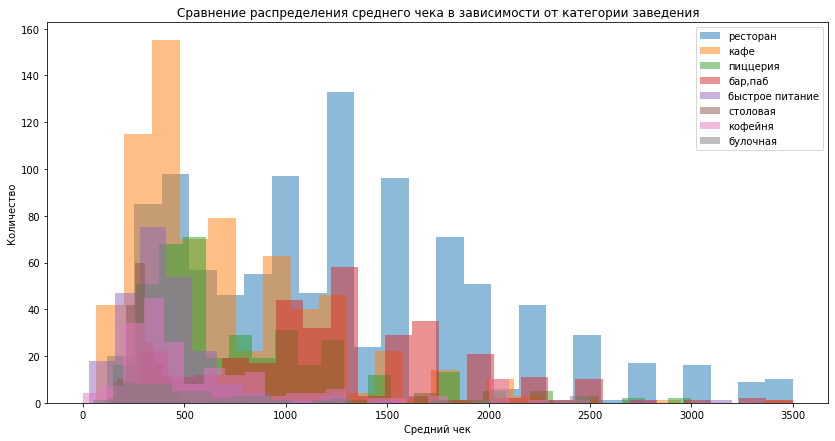

In [109]:
# Строим гистограммы распределения среднего чека в зависимости от категории
plt.figure(figsize=(14, 7))

# Строим гистограммы для каждого значения category
for i in df_avg_bill_filtr['category'].unique():
    # Фильтруем данные по значению столбца category
    df_avg_bill_filtr.loc[df_avg_bill_filtr['category'] == i, 'middle_avg_bill'].plot(
        kind='hist',
        bins=25,
        alpha=0.5,
        label=f'{i}',
        legend=True
    )

# Настраиваем внешний вид графика и выводим его на экран
plt.title(f'Сравнение распределения среднего чека в зависимости от категории заведения')
plt.xlabel('Средний чек')
plt.ylabel('Количество')

plt.show()

На графике видно, что в Центральном административном округе частота распределения среднего чека выше, чем в остальных административных округах, но и количество заведений в ЦАО в целом выше, чем в других АО.

Но в целом картина распределения по административным округам похожа, они имеют правостороннюю ассиметрию и пиковые значения среднего чека в диапазоне 500 и 1000.


In [110]:
a1_median=df_avg_bill_filtr.groupby(['district','category'])['middle_avg_bill'].median().reset_index()
a2_mean=df_avg_bill_filtr.groupby(['district','category'])['middle_avg_bill'].mean().reset_index()
merged=a1_median.merge(a2_mean, on=['district','category'],suffixes=('_med','_mean'))
merged.sort_values(by='middle_avg_bill_med',ascending=False )

,district,category,middle_avg_bill_med,middle_avg_bill_mean
14,Западный административный округ,ресторан,1250.0,1381.473214
38,Северо-Западный административный округ,ресторан,1250.0,1235.833333
40,Центральный административный округ,"бар,паб",1250.0,1375.718563
46,Центральный административный округ,ресторан,1250.0,1403.059126
16,Северный административный округ,"бар,паб",1250.0,1310.944444
...,...,...,...,...
31,Северо-Восточный административный округ,столовая,275.0,325.238095
34,Северо-Западный административный округ,быстрое питание,275.0,295.000000
55,Юго-Восточный административный округ,столовая,275.0,288.928571
52,Юго-Восточный административный округ,кофейня,250.0,263.000000


<Figure size 1008x504 with 0 Axes>

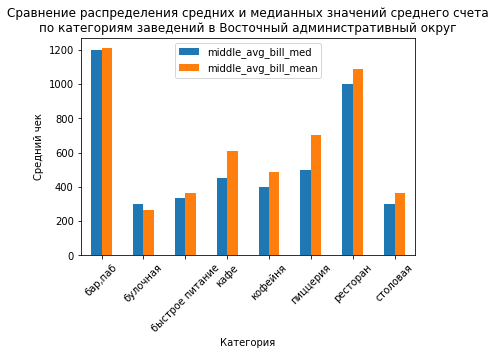

<Figure size 1008x504 with 0 Axes>

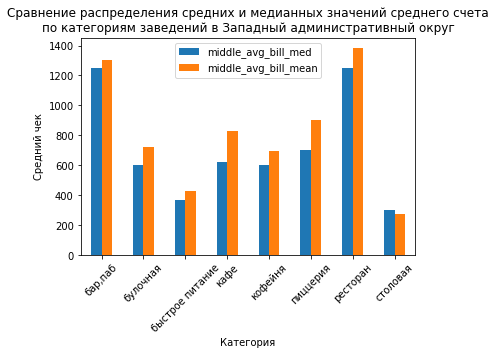

<Figure size 1008x504 with 0 Axes>

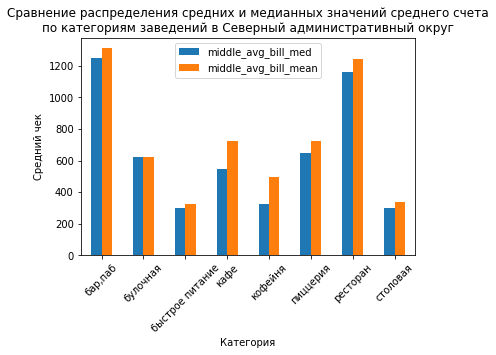

<Figure size 1008x504 with 0 Axes>

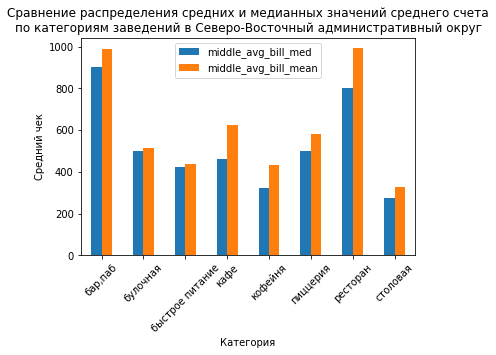

<Figure size 1008x504 with 0 Axes>

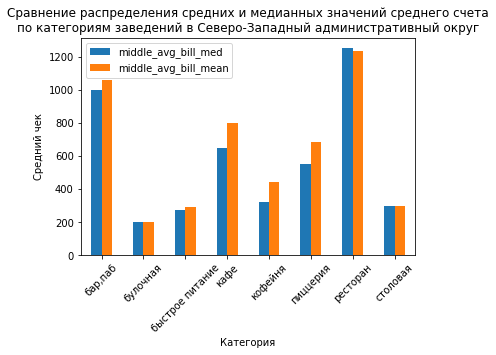

<Figure size 1008x504 with 0 Axes>

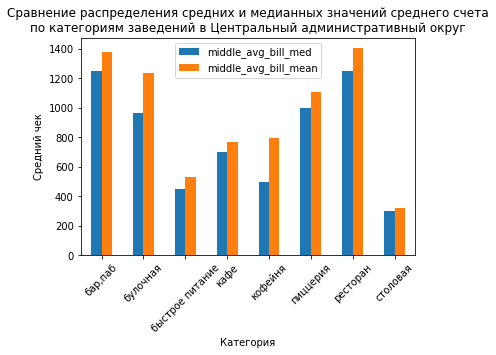

<Figure size 1008x504 with 0 Axes>

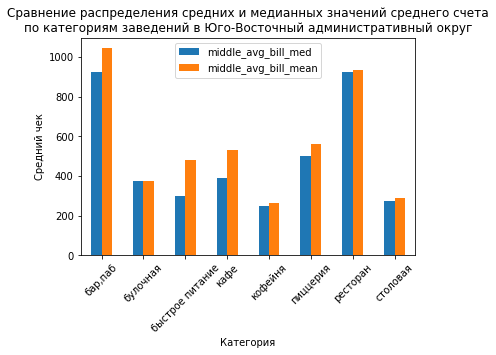

<Figure size 1008x504 with 0 Axes>

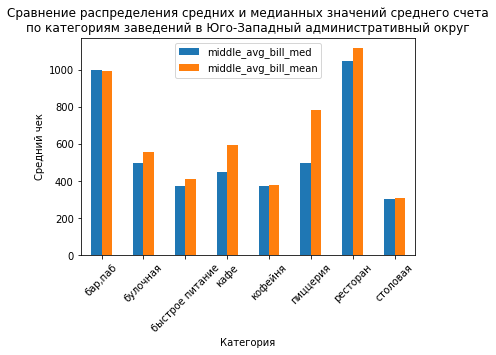

<Figure size 1008x504 with 0 Axes>

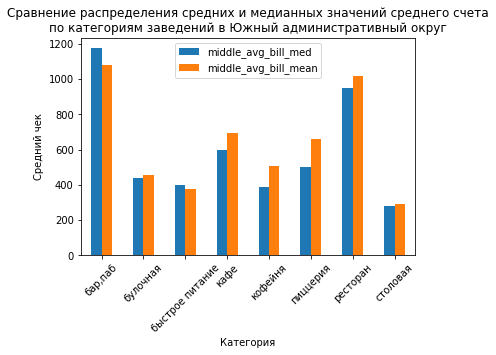

In [111]:
for i in merged['district'].unique():
    plt.figure(figsize=(14, 7))
    merged[merged['district']==i].plot(kind='bar', x='category')
    plt.title(f'Сравнение распределения средних и медианных значений среднего счета\nпо категориям заведений в {i}')
    plt.xlabel('Категория')
    plt.ylabel('Средний чек')
    plt.xticks(rotation=45)
    plt.show()

---

### Промежуточный вывод


Анализ данных показал, что:
- Самыми распространенными категориями заведений общественного питания в Москве являются: кафе (28%), ресторан (24%) и кофейня (17%).
- Абсолютным лидером среди административных округов по количеству заведений является Центральный административный округ (27%), минимальное количество в Северо-Западном административном округе (5%), а в остальных округах - примерно равное количество (в каждом около 9-10%). При этом в ЦАО самым популярной категорией заведений является ресторан.
- Несетевые заведения преобладают над сетевыми: 62% и 38% соответственно, но в каждой группе наибольшее количество имют категории заведений: кафе, ресторан, кофейня. Если рассматривать сетевые заведения, то в трех категория их доля более 50%: булочная, пиццерия, кофейня.
- Среднее количество посадочных мест варьируется достаточно широко. Но можно выделить диапазон средних значений по категориям заведений - от 78 у кафе до 100 у ресторана.
- Рейтинги заведений варьируются от 1.0 до 5.0. Распределение стремится к нормальному, но имеет левостороннюю скошенность. Среднее значение 4.2 близко к медиане 4.3. Средний рейтинг заведений по каждой группе отличается незначительно друг от друга и от среднего по всем заведениям в целом. Но можно выделить группу с максимальным рейтингом - это категория Бар, паб.
- На рейтинг заведений в большей мере влияют 2 показателя: ценовая политика и расположение заведения. Чем выше уровень цен, тем выше рейтинг заведения.  Рейтинг заведений в ЦАО выше среднего уровня рейтинга и выше, чем рейтинг в других АО.
- Список топ-15 популярных сетей Москвы возглавляет Кафе и Шоколядница. Рассматривая Топ-15 сейтей заведений по категриям, видим, что самое большая по количеству заведений категория - это кофейни и кафе, а по рейтингу категрии примерно равны, но лидеров тоже можно выделить - это пиццерии и рестораны.
- Распределение величины среднего чека в заведениях неравномерно, но имеет правостороннюю ассиметрию. Как в целом, так и в разрезе административных округов, выделяются два диапазона наиболее распространенного уровня среднего чека - это диапазоны в районе 500 и 1000.

## 4. Итоговый вывод и рекомендации <a id='soderjanie_4'></a>

В ходе исследования проанализировали данные с 8406 заведениями общественного питания Москвы, полученные за период лета 2022 года. Данные включаали общую информоцацию о заведениях и об их ценовой политике. Подробно исследованы категории заведений, их месторасположение, рейтинг, количество посадочных мест, величина среднего чека, а также признак того, является ли заведение сетевым. 

Исследование позволило определить, что самые распространенные категории заведений - это кафе и рестораны. Большинство заведений Москвы расположены в Центральном административном округе. Несетевых заведений больше, чем сетевых. А среднее количество посадочных мест в заведении - это 88. Наибольшим рейтингом обладают бары,пабы, пиццерии и рестораны. Рейтинг больше у заведений с высоким уровнем цен, расположенных в Центральном административном округе. Среди сетевых заведений популярностью пользуются кафе и кофейни. Наиболее распространенная ценовая политика - это 500 и 1000 р.

В качестве рекомендаций по открытию нового заведения стоит обратить внимание на популярные и высокие по рейтингу среди посетителей категории заведений - бар, паб и пиццерия, находящиеся ближе ц центру. Выбрать распространенную, но не низкую, ценовую политику и рассчитывать на средний чек от 1000 р. 


